In [1]:
import pandas as pd
from utils import preprocess, plot_ctr, costs_to_ctr
from cb import simulate
from vowpalwabbit import Workspace
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("train.csv")
X, y, label_mapping = preprocess(df)
X.head()

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS
0,0,24.443011,1.699998,81.669950,0,0,2.000000,2.983297,0,0,2.763573,0,0.000000,0.976473,0,0
1,1,18.000000,1.560000,57.000000,0,0,2.000000,3.000000,1,0,2.000000,0,1.000000,1.000000,1,1
2,1,18.000000,1.711460,50.165754,0,0,1.880534,1.411685,0,0,1.910378,0,0.866045,1.673584,1,0
3,1,20.952737,1.710730,131.274851,0,0,3.000000,3.000000,0,0,1.674061,0,1.467863,0.780199,0,0
4,0,31.641081,1.914186,93.798055,0,0,2.679664,1.971472,0,0,1.979848,0,1.967973,0.931721,0,0


In [3]:
X = X.to_numpy()
y = y.to_numpy()

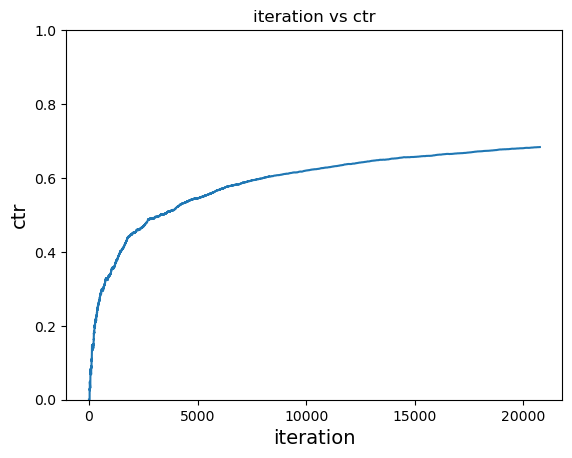

In [4]:
model = Workspace(f"--cb_explore {7} --first 100", enable_logging=True)
costs = simulate(model, X, y, np.unique(y), True)
ctr = costs_to_ctr(costs)
plot_ctr(ctr)
plt.show()

In [5]:
avg_regret = ctr[-1]
avg_regret

0.6835918681953945

In [6]:
model.finish()
model.get_log()

['using no cache',
 'Reading datafile = none',
 'num sources = 0',
 'Num weight bits = 18',
 'learning rate = 0.5',
 'initial_t = 0',
 'power_t = 0.5',
 'cb_type = mtr',
 'Enabled learners: gd, scorer-identity, csoaa_ldf-rank, cb_adf, cb_explore_adf_first, shared_feature_merger, cb_to_cbadf',
 'Input label = CB',
 'Output pred = ACTION_PROBS',
 'average  since         example        example        current        current  current',
 'loss     last          counter         weight          label        predict features',
 'n.a.     n.a.                1            1.0        unknown         0:0.14      119',
 'n.a.     n.a.                2            2.0        unknown         0:0.14      119',
 'n.a.     n.a.                4            4.0        unknown         0:0.14      119',
 'n.a.     n.a.                8            8.0        unknown         0:0.14      119',
 'n.a.     n.a.               16           16.0        unknown         0:0.14      119',
 'n.a.     n.a.               3